## MAESTRÍA EN CIENCIAS DE LOS DATOS Y ANALÍTICA
## PROYECTO INTEGRADOR

Diana Catalina Velasquez Gaviria

Jairo Abad Loaiza Gutierrez

Juan Sevastian Moreno Zapata

Julián Castelblanco Benítez

Mariana Arboleda Florez

## UNIVERSIDAD EAFIT

Se importan y se cargan librerías

In [104]:
import math
import re                        #regular expressions
import matplotlib.pyplot as plt
import nltk                      #libreria de procesamiento natural del lenguaje 
import glob
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer # otra lib para stemming
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import FreqDist
#from datetime import datetime, date, time, timedelta
import time
#nltk.download('stopwords')
#nltk.download('wordnet')


Se definen y cargan Variables Globales

In [105]:
printing_funct=0           # para controlar la impresión en las funciones
printing_global=1          # para controlar la impresión el el progrma principal
printing_summary=1         # para controlar si se imprime el resumen final
sw=stopwords.words('english')
wordnet_lemmatizer= WordNetLemmatizer()
#stemmer2= LancasterStemmer()  
#PATH='E:\JLOAIZA\JLOAIZA_ANTERIOR\JL\EDU\EAF_MDSA\SEMESTER_01\ALMACENAMIENTO_RECUPERACION\PI_PARTE_1\*.txt'
PATH='/home/jloaiza6/datasets/pi/papers-txt/*.txt'

Función tokenización

In [106]:
def tokenizer(text):
    """
    Tokeniza un texto y filtra los tokens con long>1 y que sean alfabéticos
    Input: un texto
    Return: una lista con los tokens del texto
    """
    tokens= text.split() 
    tokens=[w.lower() for w in tokens if (len(w)>1) and w.isalpha()] # pasar a minúscula seleccionar palabras>1 y que sean letras 
    if (printing_funct):
        print ("Nro Tokens despúes de tokenizar: ",len(tokens))
    
    return tokens

Función remover carácteres especiales

In [107]:
def remove_special_characters_list(list):
    """
    Remueve caracteres especiales
    Input: un texto
    Return: una lista con los tokens del texto
    """
    if (printing_funct):
        print("Nro Palabras ANTES de remove_special_characters_list",len(list))
        
    for w in list:
        re.sub('[^\w\s]','', w)
        re.sub('_','', w)
        re.sub('\s+',' ', w)
        
    list=[w for w in list if (len(w)>1) and w.isalpha()]
    if (printing_funct):
        print("Nro Palabras DESPUÉS de remove_special_characters_list",len(list))
    
    return list

Funcion Remover Stop-Words

In [108]:
def remove_stop_words(list):
    """
    Remueve stop words de Inglés
    Input: una lista de palabras
    Return: una lista sin stopwords
    """
    global sw
    
    if (printing_funct):
        print("Nro Palabras ANTES de stop_words",len(list))
        
    list=[w for w in list if w not in sw]
    if (printing_funct):
        print("Nro Palabras DESPUÉS de stop_words",len(list))
        
    return list

Función Filtrar sólo las palabras del Diccionario Inglés

In [109]:
def english_dict(list):
    """
    input : Lista con palabras
    Return: Lista con palabras que estén en el diccionario Inglés
    """
    if (printing_funct):
        print("Palabras ANTES de english_dict: ", len(list))
        
    list= [w for w in list if wordnet.synsets(w)]
    if (printing_funct):
        print("Palabras DESPUÉS de english_dict: ", len(list))
        
    return list

Se hace stemming para quitar palabras que tienen la misma raíz

In [110]:
def stemmer(list):
    """
    input : Lista con palabras
    Return: Lista con stemming aplicado
    """
    #global stemmer
    stemmer= PorterStemmer() 
    if (printing_funct):
        print("Palabras ANTES de stemmer: ", len(list))
        
    list = [stemmer.stem(w) for w in list]  
    if (printing_funct):
        print("Palabras DESPUÉS de stemmer: ", len(list))
    
    return list

Función Lematizar texto: reemplazar palabras que significan lo mismo: is are ==> be

In [111]:
def lematizer(list):
    """
    input : Lista con palabras
    Return: Lista lematizada
    """   
    if (printing_funct):
        print("Palabras ANTES de Lematizer: ", len(list))
        
    list= [wordnet_lemmatizer.lemmatize(w, pos="v") for w in list]  #lematiza los verbos 
    list= [wordnet_lemmatizer.lemmatize(w, pos="a") for w in list]  #lematiza los adjetivos 
    list= [wordnet_lemmatizer.lemmatize(w, pos="n") for w in list]  #lematiza los sustantivos 
    if (printing_funct):
        print("Palabras DESPUÉS de Lematizer: ", len(list))
    
    return list

Se crea un diccionario de frecuencias para cada palabra en cada documento

In [112]:
def create_freq_dict(id, list):
    """
    Funcion para crear un Diccionario con la frecuencia de las palabras de cada Documento
    Cada llamado a la función, calcula la frecuencia de las palabras de un Documento con ID:id
    input : Id: Id del doc
            List: Lista con palabras
    Return: None
    Aquí directamente en la función se crea el Dicccionario con las frecuencias
    """     
        
    global freqDict_list
    
    freq_dict = {}
    for word in list:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
    
    temp = {'doc_id':id, 'freq_dict':freq_dict}
    freqDict_list.append(temp)
    
    return None

Se calcula el TF (Term Frequency)

In [113]:
def computeTF(doc_info,freqDict_list):
    """
    Se crea una lista con la frecuencia de cada palabra en cada uno de los Documentos
    input : doc_info      : Lista con los Id de los Docs
            freqDict_list : Lista con un Diccionario con la frecuencia de cada palabra en cada Documento
    
    TF = (Nro. de veces que aparece la palabra en el Doc)/(Total de palabras en el Doc)
    
    Return: Una Lista TF_Scores con un diccionario con la frecuencia relativa de cada palabra en el doc
    """      
    
    TF_scores = []
    for tempDict in freqDict_list:
        TF_score = {}
        id = tempDict['doc_id']
        words_in_doc = doc_info[id-1]['doc_length']
        for word in tempDict['freq_dict']:
                TF_score[word] = tempDict['freq_dict'][word]/words_in_doc
                
        temp = {'doc_id':id, 'TF_score':TF_score}
        TF_scores.append(temp)
        
    return TF_scores

Se calcula el IDF (Inverse Term Frequency)

In [114]:
def computeIDF(doc_info,freqDict_list):
    """
    Se crea una lista con la Frecuencia Inversa de cada palabra en cada Documento
    input : doc_info      : Lista con los Id de los Docs
            freqDict_list : Lista con un Diccionario con la frecuencia de cada palabra en cada Documento
    
    IDF = log((Nro. Total de Docs)/(Nro. de Docs que contienen la palabra))
    
    Return: Una Lista IDF_Scores con un diccionario con la Frecuencia Inversa de cada palabra en el doc
    """      
    IDF_scores = []
    total_docs = len(doc_info)
    for dict in freqDict_list:
        IDF_score = {}
        id = dict['doc_id']
        for word in dict['freq_dict'].keys():
            count = sum([word in tempDict['freq_dict'] for tempDict in freqDict_list])
            IDF_score[word] = math.log(total_docs/count)
            
        temp = {'doc_id':id, 'IDF_score':IDF_score}
        IDF_scores.append(temp)

    return IDF_scores


Se calcula el TFIDF (Term Frequency-Inverse Document Frequency)

In [115]:
def computeTFIDF(TF_scores,IDF_scores):
    """
    Se crea una lista con el TFIDFde cada palabra en cada Documento
    input : TF_scores  : Lista con el TF de las palabras en c/d de los Documentos
            IDF_scores : Lista con un Diccionario con el IDF de cada palabra en cada Documento
    TFIDF_score = IDF_score * TF_score
    Return: Una Lista con un diccionario con el TFIDF de cada palabra en c/u de los Docs
    """      
    TFIDF_scores = []
    i = 0
    for dict in IDF_scores:
        TFIDF_score = {}
        id = dict['doc_id']
        for word in dict['IDF_score'].keys():
            TFIDF_score[word] = dict['IDF_score'][word] * TF_scores[i]['TF_score'][word]
        
        i += 1
        temp = {'doc_id':id, 'TFIDF_score':TFIDF_score}
        TFIDF_scores.append(temp)
        
    return TFIDF_scores

# PROGRAMA PRINCIPAL
Se leen los datos

In [116]:
general_initial_time = time.time()
date_format = ("%Y-%m-%d - %H:%M:%S")
general_initial_time_F = time.strftime(date_format)
if (printing_global):
        print("===============================================================================")
        print("Inicia Proceso : ", time.strftime(date_format))
        
list_of_files = glob.glob(PATH)  # create the list of
text2 = ""
doc_info = []
freqDict_list = []
i = 0
for file_name in list_of_files:
    #print(file_name)
    input_file = open(file_name,"r",encoding='iso-8859-1') #Se abre el archivo en read-only
    text = input_file.read()                               # Se lee el archivo
    input_file.close()                                     # Se cierra el archivo
    text2 = text2 + text                         # un SUPER-STRING donde se guarda el texto completo y CRUDO(sin limpieza)
    text_tokens = ""
    text_tokens = tokenizer(text)                             # Se tokeniza el texto del archivo
    text_tokens = remove_special_characters_list(text_tokens) # Se tokeniza el texto del archivo
    text_tokens = remove_stop_words(text_tokens)              # Se remueven stop-words
    text_tokens = english_dict(text_tokens)                   # Se seleccionan sólo las palabras en el diccionario Ingles
    text_tokens = stemmer(text_tokens)                        # Stemming
    text_tokens = lematizer(text_tokens)                      # lematiza
    i += 1
    if (printing_global):
        print("===============================================================================")
        print("Se leyó Documento :" ,i)
        
    temp = {'doc_id':i,'doc_length':len(text_tokens)}
    doc_info.append(temp)
    create_freq_dict(i, text_tokens)             # Se crea la frecuencia de c/palabra en el doc

elapsed_time1 = time.time() - general_initial_time
if (printing_global):
    print("===============================================================================")
    print("Tiempo Lectura archivos, matriz doc_info y freqDict_list (H:M:S) :", time.strftime("%H:%M:%S", time.gmtime(elapsed_time1)))

if (printing_global):
    print("Total Archivos leídos              :", i)
    print("Nro Registros matriz doc_info      :", len(doc_info))
    print("Nro Registros matriz freqDict_list :", len(freqDict_list))
    print("===============================================================================")
    print("Calculando TF_Scores") 
    print("Inicia Proceso   : ", time.strftime(date_format))
    
TF_time1 = time.time()
TF_scores = computeTF(doc_info,freqDict_list)    # Se calcula el TF de todas las palabras en todos los Docs
TF_time2 = time.time()
TF_elapsed_time = TF_time2 - TF_time1

if (printing_global):
    print("Termina Proceso  : ", time.strftime(date_format))
    print("Duración Proceso : ", time.strftime("%H:%M:%S", time.gmtime(TF_elapsed_time)))
    print("Nro Registros    : ", len(TF_scores)) 
    print("===============================================================================")
    print("Calculando IDF_scores")
    print("Inicia Proceso   : ", time.strftime(date_format))
    
IDF_time1 = time.time()
IDF_scores = computeIDF(doc_info,freqDict_list)  # Se calcula el IDF de todas las palabras en todos los Docs
IDF_time2 = time.time()
IDF_elapsed_time = IDF_time2 - IDF_time1

if (printing_global):
    print("Termina Proceso  : ", time.strftime(date_format))
    print("Duración Proceso : ", time.strftime("%H:%M:%S", time.gmtime(IDF_elapsed_time)))
    print("Nro Registros    : ", len(IDF_scores))  
    print("===============================================================================")
    print("Calculando TFIDF_scores -- ", len(TF_scores)*len(IDF_scores), " Iteraciones")
    print("Inicia Proceso   : ", time.strftime(date_format))

TFIDF_time1 = time.time()
TFIDF_scores = computeTFIDF(TF_scores,IDF_scores) # Se calcula el TFIDF de todas las palabras en todos los Docs
TFIDF_time2 = time.time()
TFIDF_elapsed_time = TFIDF_time2 - TFIDF_time1
general_final_time = time.time()
general_total_time = general_final_time - general_initial_time
    
if (printing_global):
    print("Termina Proceso  : ", time.strftime(date_format))
    print("Duración Proceso : ", time.strftime("%H:%M:%S", time.gmtime(TFIDF_elapsed_time)))    
    print("Nro Registros    : ", len(TFIDF_scores))  
    print("===============================================================================")
    
if (printing_summary):    
    print("===============================================================================")
    print("Total Archivos Leídos            : ", len(list_of_files))
    print("Total Carácteres del SUPER-STRING: ",len(text2))
    print("===============================================================================")
    print("LISTA doc_info  ==  Nro Registros doc_info : ", len(doc_info)) 
    print(doc_info[:5])
    print("===============================================================================")
    print("LISTA freqDict_list  ==  Nro Registros : ", len(freqDict_list)) 
    print(freqDict_list[:2])
    print("===============================================================================")
    print("LISTA TF_scores  ==  Nro Registros : ", len(TF_scores)) 
    print(TF_scores[:2])
    print("===============================================================================")
    print("LISTA IDF_scores  ==  Nro Registros : ", len(IDF_scores))  
    print(IDF_scores[:2])
    print("===============================================================================")
    print("LISTA TFIDF_scores  ==  Nro Registros : ", len(TFIDF_scores)) 
    print("Nro Iteraciones para calcualr TDIDF : ", len(TF_scores)*len(IDF_scores))
    print(TFIDF_scores[:2])
    print("===============================================================================")
    print("===============================================================================")
    
print("Inicia Proceso General             : ", general_initial_time_F)
print("Finaliza Proceso General           : ", time.strftime(date_format))
print("Duración TOTAL del Proceso (H:M:S) : ", time.strftime("%H:%M:%S", time.gmtime(general_total_time)))  
print("=====================      END  OF  THE  ROAD      ============================")
    

Inicia Proceso :  2019-04-20 - 10:45:44
Se leyó Documento : 1
Se leyó Documento : 2
Se leyó Documento : 3
Se leyó Documento : 4
Se leyó Documento : 5
Se leyó Documento : 6
Se leyó Documento : 7
Se leyó Documento : 8
Se leyó Documento : 9
Se leyó Documento : 10
Se leyó Documento : 11
Se leyó Documento : 12
Se leyó Documento : 13
Se leyó Documento : 14
Se leyó Documento : 15
Se leyó Documento : 16
Se leyó Documento : 17
Se leyó Documento : 18
Se leyó Documento : 19
Se leyó Documento : 20
Se leyó Documento : 21
Se leyó Documento : 22
Se leyó Documento : 23
Se leyó Documento : 24
Se leyó Documento : 25
Se leyó Documento : 26
Se leyó Documento : 27
Se leyó Documento : 28
Se leyó Documento : 29
Se leyó Documento : 30
Se leyó Documento : 31
Se leyó Documento : 32
Se leyó Documento : 33
Se leyó Documento : 34
Se leyó Documento : 35
Se leyó Documento : 36
Se leyó Documento : 37
Se leyó Documento : 38
Se leyó Documento : 39
Se leyó Documento : 40
Se leyó Documento : 41
Se leyó Documento : 42
Se 

Se leyó Documento : 81
Se leyó Documento : 82
Se leyó Documento : 83
Se leyó Documento : 84
Se leyó Documento : 85
Se leyó Documento : 86
Se leyó Documento : 87
Se leyó Documento : 88
Se leyó Documento : 89
Se leyó Documento : 90
Se leyó Documento : 91
Se leyó Documento : 92
Se leyó Documento : 93
Se leyó Documento : 94
Se leyó Documento : 95
Se leyó Documento : 96
Se leyó Documento : 97
Se leyó Documento : 98
Se leyó Documento : 99
Se leyó Documento : 100
Se leyó Documento : 101
Se leyó Documento : 102
Se leyó Documento : 103
Se leyó Documento : 104
Se leyó Documento : 105
Se leyó Documento : 106
Se leyó Documento : 107
Se leyó Documento : 108
Se leyó Documento : 109
Se leyó Documento : 110
Se leyó Documento : 111
Se leyó Documento : 112
Se leyó Documento : 113
Se leyó Documento : 114
Se leyó Documento : 115
Se leyó Documento : 116
Se leyó Documento : 117
Se leyó Documento : 118
Se leyó Documento : 119
Se leyó Documento : 120
Se leyó Documento : 121
Se leyó Documento : 122
Se leyó Doc

Se leyó Documento : 161
Se leyó Documento : 162
Se leyó Documento : 163
Se leyó Documento : 164
Se leyó Documento : 165
Se leyó Documento : 166
Se leyó Documento : 167
Se leyó Documento : 168
Se leyó Documento : 169
Se leyó Documento : 170
Se leyó Documento : 171
Se leyó Documento : 172
Se leyó Documento : 173
Se leyó Documento : 174
Se leyó Documento : 175
Se leyó Documento : 176
Se leyó Documento : 177
Se leyó Documento : 178
Se leyó Documento : 179
Se leyó Documento : 180
Se leyó Documento : 181
Se leyó Documento : 182
Se leyó Documento : 183
Se leyó Documento : 184
Se leyó Documento : 185
Se leyó Documento : 186
Se leyó Documento : 187
Se leyó Documento : 188
Se leyó Documento : 189
Se leyó Documento : 190
Se leyó Documento : 191
Se leyó Documento : 192
Se leyó Documento : 193
Se leyó Documento : 194
Se leyó Documento : 195
Se leyó Documento : 196
Se leyó Documento : 197
Se leyó Documento : 198
Se leyó Documento : 199
Se leyó Documento : 200
Se leyó Documento : 201
Se leyó Document

Se leyó Documento : 241
Se leyó Documento : 242
Se leyó Documento : 243
Se leyó Documento : 244
Se leyó Documento : 245
Se leyó Documento : 246
Se leyó Documento : 247
Se leyó Documento : 248
Se leyó Documento : 249
Se leyó Documento : 250
Se leyó Documento : 251
Se leyó Documento : 252
Se leyó Documento : 253
Se leyó Documento : 254
Se leyó Documento : 255
Se leyó Documento : 256
Se leyó Documento : 257
Se leyó Documento : 258
Se leyó Documento : 259
Se leyó Documento : 260
Se leyó Documento : 261
Se leyó Documento : 262
Se leyó Documento : 263
Se leyó Documento : 264
Se leyó Documento : 265
Se leyó Documento : 266
Se leyó Documento : 267
Se leyó Documento : 268
Se leyó Documento : 269
Se leyó Documento : 270
Se leyó Documento : 271
Se leyó Documento : 272
Se leyó Documento : 273
Se leyó Documento : 274
Se leyó Documento : 275
Se leyó Documento : 276
Se leyó Documento : 277
Se leyó Documento : 278
Se leyó Documento : 279
Se leyó Documento : 280
Se leyó Documento : 281
Se leyó Document

Se leyó Documento : 320
Se leyó Documento : 321
Se leyó Documento : 322
Se leyó Documento : 323
Se leyó Documento : 324
Se leyó Documento : 325
Se leyó Documento : 326
Se leyó Documento : 327
Se leyó Documento : 328
Se leyó Documento : 329
Se leyó Documento : 330
Se leyó Documento : 331
Se leyó Documento : 332
Se leyó Documento : 333
Se leyó Documento : 334
Se leyó Documento : 335
Se leyó Documento : 336
Se leyó Documento : 337
Se leyó Documento : 338
Se leyó Documento : 339
Se leyó Documento : 340
Se leyó Documento : 341
Se leyó Documento : 342
Se leyó Documento : 343
Se leyó Documento : 344
Se leyó Documento : 345
Se leyó Documento : 346
Se leyó Documento : 347
Se leyó Documento : 348
Se leyó Documento : 349
Se leyó Documento : 350
Se leyó Documento : 351
Se leyó Documento : 352
Se leyó Documento : 353
Se leyó Documento : 354
Se leyó Documento : 355
Se leyó Documento : 356
Se leyó Documento : 357
Se leyó Documento : 358
Se leyó Documento : 359
Se leyó Documento : 360
Se leyó Document

Se leyó Documento : 401
Se leyó Documento : 402
Se leyó Documento : 403
Se leyó Documento : 404
Se leyó Documento : 405
Se leyó Documento : 406
Se leyó Documento : 407
Se leyó Documento : 408
Se leyó Documento : 409
Se leyó Documento : 410
Se leyó Documento : 411
Se leyó Documento : 412
Se leyó Documento : 413
Se leyó Documento : 414
Se leyó Documento : 415
Se leyó Documento : 416
Se leyó Documento : 417
Se leyó Documento : 418
Se leyó Documento : 419
Se leyó Documento : 420
Se leyó Documento : 421
Se leyó Documento : 422
Se leyó Documento : 423
Se leyó Documento : 424
Se leyó Documento : 425
Se leyó Documento : 426
Se leyó Documento : 427
Se leyó Documento : 428
Se leyó Documento : 429
Se leyó Documento : 430
Se leyó Documento : 431
Se leyó Documento : 432
Se leyó Documento : 433
Se leyó Documento : 434
Se leyó Documento : 435
Se leyó Documento : 436
Se leyó Documento : 437
Se leyó Documento : 438
Se leyó Documento : 439
Se leyó Documento : 440
Se leyó Documento : 441
Se leyó Document

Se leyó Documento : 480
Se leyó Documento : 481
Se leyó Documento : 482
Se leyó Documento : 483
Se leyó Documento : 484
Se leyó Documento : 485
Se leyó Documento : 486
Se leyó Documento : 487
Se leyó Documento : 488
Se leyó Documento : 489
Se leyó Documento : 490
Se leyó Documento : 491
Se leyó Documento : 492
Se leyó Documento : 493
Se leyó Documento : 494
Se leyó Documento : 495
Se leyó Documento : 496
Se leyó Documento : 497
Se leyó Documento : 498
Se leyó Documento : 499
Se leyó Documento : 500
Se leyó Documento : 501
Se leyó Documento : 502
Se leyó Documento : 503
Se leyó Documento : 504
Se leyó Documento : 505
Se leyó Documento : 506
Se leyó Documento : 507
Se leyó Documento : 508
Se leyó Documento : 509
Se leyó Documento : 510
Se leyó Documento : 511
Se leyó Documento : 512
Se leyó Documento : 513
Se leyó Documento : 514
Se leyó Documento : 515
Se leyó Documento : 516
Se leyó Documento : 517
Se leyó Documento : 518
Se leyó Documento : 519
Se leyó Documento : 520
Se leyó Document

Se leyó Documento : 561
Se leyó Documento : 562
Se leyó Documento : 563
Se leyó Documento : 564
Se leyó Documento : 565
Se leyó Documento : 566
Se leyó Documento : 567
Se leyó Documento : 568
Se leyó Documento : 569
Se leyó Documento : 570
Se leyó Documento : 571
Se leyó Documento : 572
Se leyó Documento : 573
Se leyó Documento : 574
Se leyó Documento : 575
Se leyó Documento : 576
Se leyó Documento : 577
Se leyó Documento : 578
Se leyó Documento : 579
Se leyó Documento : 580
Se leyó Documento : 581
Se leyó Documento : 582
Se leyó Documento : 583
Se leyó Documento : 584
Se leyó Documento : 585
Se leyó Documento : 586
Se leyó Documento : 587
Se leyó Documento : 588
Se leyó Documento : 589
Se leyó Documento : 590
Se leyó Documento : 591
Se leyó Documento : 592
Se leyó Documento : 593
Se leyó Documento : 594
Se leyó Documento : 595
Se leyó Documento : 596
Se leyó Documento : 597
Se leyó Documento : 598
Se leyó Documento : 599
Se leyó Documento : 600
Se leyó Documento : 601
Se leyó Document

Se leyó Documento : 640
Se leyó Documento : 641
Se leyó Documento : 642
Se leyó Documento : 643
Se leyó Documento : 644
Se leyó Documento : 645
Se leyó Documento : 646
Se leyó Documento : 647
Se leyó Documento : 648
Se leyó Documento : 649
Se leyó Documento : 650
Se leyó Documento : 651
Se leyó Documento : 652
Se leyó Documento : 653
Se leyó Documento : 654
Se leyó Documento : 655
Se leyó Documento : 656
Se leyó Documento : 657
Se leyó Documento : 658
Se leyó Documento : 659
Se leyó Documento : 660
Se leyó Documento : 661
Se leyó Documento : 662
Se leyó Documento : 663
Se leyó Documento : 664
Se leyó Documento : 665
Se leyó Documento : 666
Se leyó Documento : 667
Se leyó Documento : 668
Se leyó Documento : 669
Se leyó Documento : 670
Se leyó Documento : 671
Se leyó Documento : 672
Se leyó Documento : 673
Se leyó Documento : 674
Se leyó Documento : 675
Se leyó Documento : 676
Se leyó Documento : 677
Se leyó Documento : 678
Se leyó Documento : 679
Se leyó Documento : 680
Se leyó Document

Se leyó Documento : 720
Se leyó Documento : 721
Se leyó Documento : 722
Se leyó Documento : 723
Se leyó Documento : 724
Se leyó Documento : 725
Se leyó Documento : 726
Se leyó Documento : 727
Se leyó Documento : 728
Se leyó Documento : 729
Se leyó Documento : 730
Se leyó Documento : 731
Se leyó Documento : 732
Se leyó Documento : 733
Se leyó Documento : 734
Se leyó Documento : 735
Se leyó Documento : 736
Se leyó Documento : 737
Se leyó Documento : 738
Se leyó Documento : 739
Se leyó Documento : 740
Se leyó Documento : 741
Se leyó Documento : 742
Se leyó Documento : 743
Se leyó Documento : 744
Se leyó Documento : 745
Se leyó Documento : 746
Se leyó Documento : 747
Se leyó Documento : 748
Se leyó Documento : 749
Se leyó Documento : 750
Se leyó Documento : 751
Se leyó Documento : 752
Se leyó Documento : 753
Se leyó Documento : 754
Se leyó Documento : 755
Se leyó Documento : 756
Se leyó Documento : 757
Se leyó Documento : 758
Se leyó Documento : 759
Se leyó Documento : 760
Se leyó Document

Se leyó Documento : 800
Se leyó Documento : 801
Se leyó Documento : 802
Se leyó Documento : 803
Se leyó Documento : 804
Se leyó Documento : 805
Se leyó Documento : 806
Se leyó Documento : 807
Se leyó Documento : 808
Se leyó Documento : 809
Se leyó Documento : 810
Se leyó Documento : 811
Se leyó Documento : 812
Se leyó Documento : 813
Se leyó Documento : 814
Se leyó Documento : 815
Se leyó Documento : 816
Se leyó Documento : 817
Se leyó Documento : 818
Se leyó Documento : 819
Se leyó Documento : 820
Se leyó Documento : 821
Se leyó Documento : 822
Se leyó Documento : 823
Se leyó Documento : 824
Se leyó Documento : 825
Se leyó Documento : 826
Se leyó Documento : 827
Se leyó Documento : 828
Se leyó Documento : 829
Se leyó Documento : 830
Se leyó Documento : 831
Se leyó Documento : 832
Se leyó Documento : 833
Se leyó Documento : 834
Se leyó Documento : 835
Se leyó Documento : 836
Se leyó Documento : 837
Se leyó Documento : 838
Se leyó Documento : 839
Se leyó Documento : 840
Se leyó Document

Se leyó Documento : 879
Se leyó Documento : 880
Se leyó Documento : 881
Se leyó Documento : 882
Se leyó Documento : 883
Se leyó Documento : 884
Se leyó Documento : 885
Se leyó Documento : 886
Se leyó Documento : 887
Se leyó Documento : 888
Se leyó Documento : 889
Se leyó Documento : 890
Se leyó Documento : 891
Se leyó Documento : 892
Se leyó Documento : 893
Se leyó Documento : 894
Se leyó Documento : 895
Se leyó Documento : 896
Se leyó Documento : 897
Se leyó Documento : 898
Se leyó Documento : 899
Se leyó Documento : 900
Se leyó Documento : 901
Se leyó Documento : 902
Se leyó Documento : 903
Se leyó Documento : 904
Se leyó Documento : 905
Se leyó Documento : 906
Se leyó Documento : 907
Se leyó Documento : 908
Se leyó Documento : 909
Se leyó Documento : 910
Se leyó Documento : 911
Se leyó Documento : 912
Se leyó Documento : 913
Se leyó Documento : 914
Se leyó Documento : 915
Se leyó Documento : 916
Se leyó Documento : 917
Se leyó Documento : 918
Se leyó Documento : 919
Se leyó Document

Se leyó Documento : 960
Se leyó Documento : 961
Se leyó Documento : 962
Se leyó Documento : 963
Se leyó Documento : 964
Se leyó Documento : 965
Se leyó Documento : 966
Se leyó Documento : 967
Se leyó Documento : 968
Se leyó Documento : 969
Se leyó Documento : 970
Se leyó Documento : 971
Se leyó Documento : 972
Se leyó Documento : 973
Se leyó Documento : 974
Se leyó Documento : 975
Se leyó Documento : 976
Se leyó Documento : 977
Se leyó Documento : 978
Se leyó Documento : 979
Se leyó Documento : 980
Tiempo Lectura archivos, matriz doc_info y freqDict_list (H:M:S) : 00:03:22
Total Archivos leídos              : 980
Nro Registros matriz doc_info      : 980
Nro Registros matriz freqDict_list : 980
Calculando TF_Scores
Inicia Proceso   :  2019-04-20 - 10:49:06
Termina Proceso  :  2019-04-20 - 10:49:07
Duración Proceso :  00:00:00
Nro Registros    :  980
Calculando IDF_scores
Inicia Proceso   :  2019-04-20 - 10:49:07
Termina Proceso  :  2019-04-20 - 10:52:16
Duración Proceso :  00:03:09
Nro 

## NOTA:

Hasta aquí se han leído los archivos y se han construído las estructuras de datos (listas Python) para tener la lista de los documentos, la lista de palabras por documento, la frecuencia, la frecuencia inversa y el índice TFIDF de cada una de las palabras en cada uno de los documentos.

Por otro lado, también se ha construído un SUPER-STRING con todo el texto de todos los documentos. 

A partir de este punto vamos a LIMPIAR este SUPER-STRING para ver como se ve la evolución de la limpieza.

En estos pasos no se van a construir las listar python, dado que en el SUPER-STRING no se tiene información del documento que contiene a cada una de las palabras.


Se tokeniza el SUPER-STRING. Se seleccionan sólo cadenas alfabéticas con longitud>1
Nro de CARACTERES en el SUPER-STRING antes de Tokenizar :  69248934
Nro de Tokens en el SUPER-STRING después de Tokenizar   :  7462769
Duración Proceso HH:MM:SS :  00:00:03
Se remueven caracteres especiales, si quedó alguno después de la tokenización
Nro de Tokens en el SUPER-STRING antes de remover caracteres especiales   :  7462769
Nro de Tokens en el SUPER-STRING después de remover caracteres especiales :  7462769
Duración Proceso HH:MM:SS :  00:00:19
Se remueven stop-words del lenguaje Inglés
Nro de Tokens en el SUPER-STRING antes de remover stop-words     :  7462769
Nro de Tokens en el SUPER-STRING después de remover stop-words   :  3955737
Duración Proceso HH:MM:SS :  00:00:11
Se seleccionan sólo las palabras del SUPER-STRING que estén enel diccionario del lenguaje Inglés
Nro de Tokens en el SUPER-STRING antes de seleccionar sólo las palabras del diccionario   :  3955737
Nro de Tokens en el SUPER-

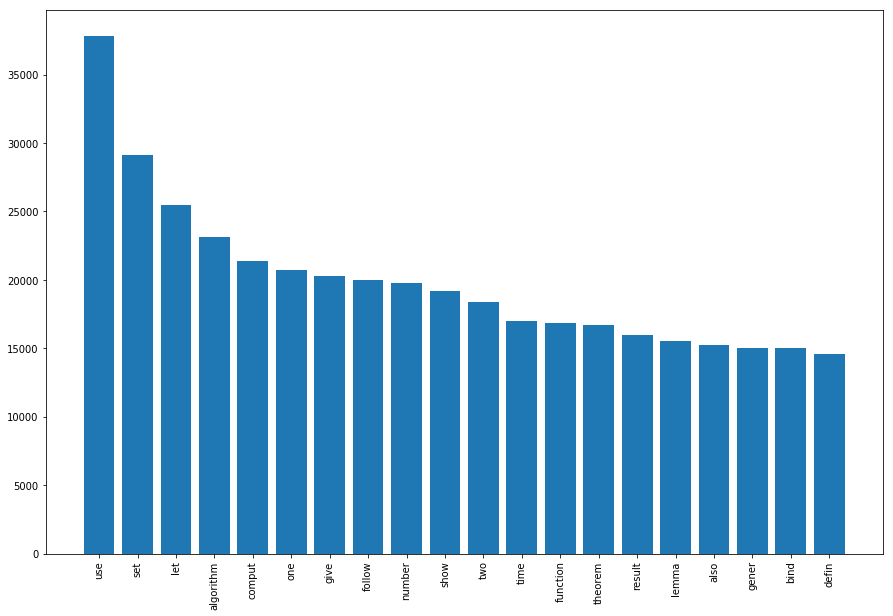

Duración Total del Proceso con el SUPER-STRING HH:MM:SS :  00:03:02
=====================      END  OF  THE  ROAD      ============================


In [103]:
print("=================================================================")
SS_initial_time = time.time()
print("Se tokeniza el SUPER-STRING. Se seleccionan sólo cadenas alfabéticas con longitud>1")
print("Nro de CARACTERES en el SUPER-STRING antes de Tokenizar : ",len(text2))
text_tokens2 = tokenizer(text2)                             # Se tokeniza el texto del archivo
print("Nro de Tokens en el SUPER-STRING después de Tokenizar   : ",len(text_tokens2))
SS2_time = time.time()
SS2_elapsed_time = SS2_time - SS_initial_time
print("Duración Proceso HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS2_elapsed_time)))    
print("=================================================================")
print("Se remueven caracteres especiales, si quedó alguno después de la tokenización")
print("Nro de Tokens en el SUPER-STRING antes de remover caracteres especiales   : ",len(text_tokens2))
text_tokens2 = remove_special_characters_list(text_tokens2) # Se tokeniza el texto del archivo
print("Nro de Tokens en el SUPER-STRING después de remover caracteres especiales : ",len(text_tokens2))
SS3_time = time.time()
SS3_elapsed_time = SS3_time - SS2_time
print("Duración Proceso HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS3_elapsed_time)))    
print("=================================================================")
print("Se remueven stop-words del lenguaje Inglés")
print("Nro de Tokens en el SUPER-STRING antes de remover stop-words     : ",len(text_tokens2))
text_tokens2 = remove_stop_words(text_tokens2)              # Se remueven stop-words
print("Nro de Tokens en el SUPER-STRING después de remover stop-words   : ",len(text_tokens2))
SS4_time = time.time()
SS4_elapsed_time = SS4_time - SS3_time
print("Duración Proceso HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS4_elapsed_time)))   
print("=================================================================")
print("Se seleccionan sólo las palabras del SUPER-STRING que estén enel diccionario del lenguaje Inglés")
print("Nro de Tokens en el SUPER-STRING antes de seleccionar sólo las palabras del diccionario   : ",len(text_tokens2))
text_tokens2 = english_dict(text_tokens2)                   # Se seleccionan sólo las palabras en el diccionario Ingles
print("Nro de Tokens en el SUPER-STRING después de seleccionar sólo las palabras del diccionario : ",len(text_tokens2))
SS5_time = time.time()
SS5_elapsed_time = SS5_time - SS4_time
print("Duración Proceso HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS5_elapsed_time)))   
print("=================================================================")
print("Se aplica el STEMMING del idioma Inglés, para convertir algunas palabras a su raíz")
print("Nro de Tokens en el SUPER-STRING antes de aplicar el STEMMING   : ",len(text_tokens2))
text_tokens2 = stemmer(text_tokens2)                        # Stemming
print("Nro de Tokens en el SUPER-STRING después de aplicar el STEMMING : ",len(text_tokens2))
SS6_time = time.time()
SS6_elapsed_time = SS6_time - SS5_time
print("Duración Proceso HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS6_elapsed_time)))   
print("=================================================================")
print("Se aplica el LEMATIZER del idioma Inglés")
print("Nro de Tokens en el SUPER-STRING antes de aplicar el LEMATIZER   : ",len(text_tokens2))
text_tokens2 = lematizer(text_tokens2)                      # lematiza
print("Nro de Tokens en el SUPER-STRING después de aplicar el LEMATIZER : ",len(text_tokens2))
SS7_time = time.time()
SS7_elapsed_time = SS7_time - SS6_time
print("Duración Proceso HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS7_elapsed_time)))   
print("=================================================================")
print("Se saca una distribución para ver cuantas palabras diferentes quedan")
fdist1 = nltk.FreqDist(text_tokens2)
print('Nro Palabras antes de la distribución              :', len(text_tokens2))
print('Nro Palabras diferentes después de la distribución :', len(fdist1))
print("=================================================================")
print('Gráfica de barras de las 20 palabras más frecuentes :')
fdist2 = fdist1.most_common(20)
#print('len fdist2=',len(fdist2))
#print(fdist2)
x,y = zip(*fdist2)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=90) # poner vertical rútulos eje x
plt.show()
print("=================================================================")
SS8_time = time.time()
SS8_elapsed_time = SS8_time - SS_initial_time
print("Duración Total del Proceso con el SUPER-STRING HH:MM:SS : ", time.strftime("%H:%M:%S", time.gmtime(SS8_elapsed_time)))   
print("=====================      END  OF  THE  ROAD      ============================")    

## ARQUITECTURA DE ESTA APLICACION

PARA ESTA APLICACIÓN SE UTILIZARON LAS ESTRUCTURAS DE DATOS QUE SE DETALLAN A CONTINUACIÓN

In [66]:
# LISTA doc_id : Una Lista python, la cual contiene un Diccionario pyton. 
# El Diccionario tiene: 
# Clave: doc_id : Un id que se le asigna a cada documento
# Valor: doc_length : nro de caracteres del documento original
# Veamos un Ejemplo de de esta lista
doc_id=[{'doc_id': 1, 'doc_length': 1424}, 
        {'doc_id': 2, 'doc_length': 1740}, 
        {'doc_id': 3, 'doc_length': 1522}, 
        {'doc_id': 4, 'doc_length': 988}, 
        {'doc_id': 5, 'doc_length': 4022}]
print(len(doc_id))     # Nro elementos de la lista
print(len(doc_id[0]))  # Nro elementos del diccionario en la posición 0 de la lista

5
2


In [71]:
# LISTA freqDict_list : Una Lista python, la cual contiene un Diccionario pyton.
# El Diccionario tiene: 
# Clave: doc_id : id del doc
# Valor: freq_dict : este es otro Diccionario, el Cual contiene:
#        Clave: una palabra
#        Valor: Frecuencia de la palabra (número de veces que esta aparece en el documento)
# La lista tiene tantos registros como documentos leídos
# El diccionario de cada documento tiene tantas claves(palabras) como palabras diferentes tenga el documento (ya limpio)
# Veamos un ejemplo de un registro de la lista; es decir, la información de un documento
#
freqDict_list=[{'doc_id': 1, 'freq_dict': {'entropi': 112, 'earli': 3, 'function': 13}}]
#
print("Elementos en la lista freqDict_list                  : ",len(freqDict_list))                 # Nro. elementos de la lista
print("===============================================================================")
print("Elementos en el registro 0 de la lista freqDict_list : ", len(freqDict_list[0]))              # Nro. elementos del diccionario en el primer registro de la lista
print("===============================================================================")
# Cada registro de la lista freqDict_list, es un Diccionario Python
print("Llaves del Diccionario                               :", freqDict_list[0].keys())            # Llaves del diccionario de la lista (aquí todos los diccionarios tienen la misma estructura)
print("===============================================================================")
print("Valores del Diccionario freqDict_list en el registro 0 de la Lista")
print(freqDict_list[0].values())          # Valores del diccionario de la lista (aquí todos los diccionarios tienen la misma estructura)
print("===============================================================================")
print("Nro Elementos en el Diccionario freqDict_list del registro 0 de la lista : ", len(freqDict_list[0]['freq_dict'])) # Nro. de elementos del diccionario freq_dict


Elementos en la lista freqDict_list                  :  1
Elementos en el registro 0 de la lista freqDict_list :  2
Llaves del Diccionario                               : dict_keys(['doc_id', 'freq_dict'])
Valores del Diccionario freqDict_list en el registro 0 de la Lista
dict_values([1, {'entropi': 112, 'earli': 3, 'function': 13}])
Nro Elementos en el Diccionario freqDict_list del registro 0 de la lista :  3


In [68]:
# LISTA TF_scores : Una Lista python, la cual contiene un Diccionario pyton.
# El Diccionario tiene: 
# Clave: doc_id : id del doc
# Valor: TF_score : este es otro Diccionario, el Cual contiene:
#        Clave: una palabra
#        Valor: Frecuencia relativa de la palabra
# La lista tiene tantos registros como documentos se hayan leído
# El diccionario de cada documento tiene tantas claves(palabras) como palabras diferentes tenga el documento (ya limpio)
# Veamos un ejemplo de un registro de la lista; es decir, la información de un documento
#
TF_scores=[{'doc_id': 1, 'TF_score': {'entropi': 0.07865168539325842, 'earli': 0.002106741573033708}}]
print(len(TF_scores))     # El nro de registros de la lista

1


In [69]:
# LISTA IDF_scores : Una Lista python, la cual contiene un Diccionario pyton.
# El Diccionario tiene: 
# Clave: doc_id : id del doc
# Valor: IDF_score : este es otro Diccionario, el Cual contiene:
#        Clave: una palabra
#        Valor: índice inverso de la palabra en el documento
# La lista tiene tantos registros como documentos se hayan leído
# El diccionario de cada documento tiene tantas claves(palabras) como palabras diferentes tenga el documento (ya limpio)
# Veamos un ejemplo de un registro de la lista; es decir, la información de un documento
#
IDF_scores=[{'doc_id': 1, 'IDF_score': {'entropi': 1.9972034434428638, 'earli': 1.5452183196998066}}]
print(len(IDF_scores))     # El nro de registros de la lista

1


In [70]:
# LISTA TFIDF_scores : Una Lista python, la cual contiene un Diccionario pyton.
# El Diccionario tiene: 
# Clave: doc_id : id del doc
# Valor: TFIDF_score : este es otro Diccionario, el Cual contiene:
#        Clave: una palabra
#        Valor: Este valor se calcula multiplicando el TF_Score * IDF_Score de cada palabra
# La lista tiene tantos registros como documentos se hayan leído
# El diccionario de cada documento tiene tantas claves(palabras) como palabras diferentes tenga el documento (ya limpio)
# Veamos un ejemplo de un registro de la lista; es decir, la información de un documento
#
TFIDF_scores=[{'doc_id': 1, 'TFIDF_score': {'entropi': 0.15708341690000052, 'earli': 0.0032553756735248735}}]
print(len(TFIDF_scores))     # El nro de registros de la lista

1
